In [ ]:
from google.colab import drive # Підключаємо Диск
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from datetime import datetime
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
file_path_ads = '/content/drive/MyDrive/Colab Notebooks/ab_test_data.csv'
df = pd.read_csv(file_path_ads)

In [7]:
# Підготовка дат

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
start_date = df['date'].min()
end_date = df['date'].max()
test_length = (end_date - start_date).days

In [9]:
# Підготовка даних про групи

group_count = df['test_group'].value_counts() # рахуємо що є
conv_count = df[df['conversion'] == 1].groupby('test_group')['conversion'].count() # рахуємо позитивні конверсії
conv_rate = conv_count/group_count * 100 # тот пойнятно
results = pd.DataFrame({'user_count': group_count, 'conversions': conv_count, 'conversion_rate':conv_rate}).reset_index() # формуємо датафрейм, з яким можна потім працювати.

In [37]:
# Друкуємо дані
print (f'Тривалість тесту - ', test_length, 'дні\n')
print ('Дані розрахунків конверсії по групах користувачів:\n')
print (round(results,2))

Тривалість тесту -  22 дні

Дані розрахунків конверсії по групах користувачів:

  test_group  user_count  conversions  conversion_rate
0          a       10013          611              6.1
1          b        9985          889              8.9


In [11]:
# Розрахунок статистики по Стьюденту

group_a_conversions = df[df['test_group'] == 'a']['conversion']
group_b_conversions = df[df['test_group'] == 'b']['conversion']
t_stat, p_value = ttest_ind(group_a_conversions, group_b_conversions)
print('Розраховуємо дані для тесту Стьюдента:\n\n\
Формулювання гіпотез:\n\
    Нульова гіпотеза (H0): Немає різниці в середніх значеннях конверсій між групами A та B.\n\
    Альтернативна гіпотеза (H1): Є різниця в середніх значеннях конверсій між групами A та B.\n\n\
Прийняття рішення:\n\n\
    Якщо p-value < 0.05, відхиляємо нульову гіпотезу (є статистично значуща різниця).\n\
    Якщо p-value ≥ 0.05, не відхиляємо нульову гіпотезу (різниці між групами немає).\n')

print(f"t-статистика: {round(t_stat,6)}")
print(f"p-значення: {p_value}")
print('\nВисновок:\n')
# Прийняття рішення
if p_value < 0.05:
    print("    Відхиляємо нульову гіпотезу: є статистично значуща різниця між групами.")
else:
    print("    Не відхиляємо нульову гіпотезу: різниці між групами немає.")

Розраховуємо дані для тесту Стьюдента:

Формулювання гіпотез:
    Нульова гіпотеза (H0): Немає різниці в середніх значеннях конверсій між групами A та B.
    Альтернативна гіпотеза (H1): Є різниця в середніх значеннях конверсій між групами A та B.

Прийняття рішення:

    Якщо p-value < 0.05, відхиляємо нульову гіпотезу (є статистично значуща різниця).
    Якщо p-value ≥ 0.05, не відхиляємо нульову гіпотезу (різниці між групами немає).

t-статистика: -7.529953
p-значення: 5.291057638517877e-14

Висновок:

    Відхиляємо нульову гіпотезу: є статистично значуща різниця між групами.


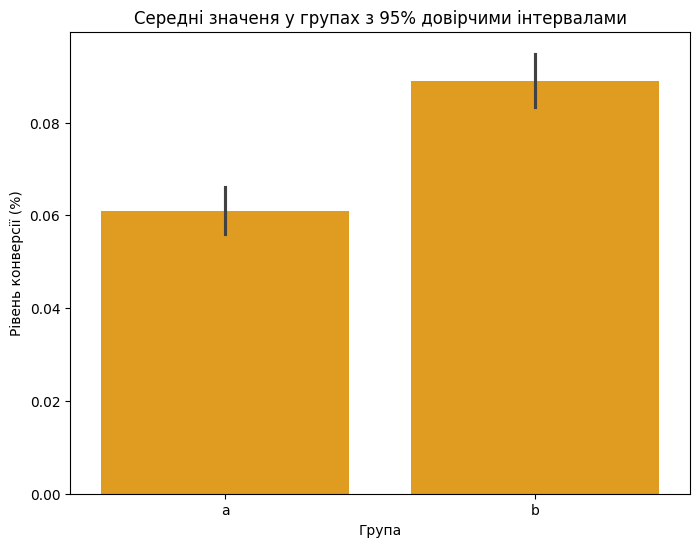

In [12]:
# Побудова графіку з довірчими інтервалами 95.

plt.figure(figsize=(8, 6))
sns.barplot(x='test_group', y='conversion', data=df, errorbar=('ci', 95), color='orange')

# Customize the plot
plt.title('Середні значеня у групах з 95% довірчими інтервалами')
plt.xlabel('Група')
plt.ylabel('Рівень конверсії (%)')

plt.show()

In [32]:
daily_data = (
    df
    .groupby(['date', 'test_group'])
    .agg(
        users_count=('conversion', 'count'),  # Кількість рядків = кількість користувачів
        conversions=('conversion', 'sum')     # Сума конверсій у цей день
    )
    .reset_index()
)
daily_data['conversion_rate'] = daily_data['conversions'] / daily_data['users_count'] * 100

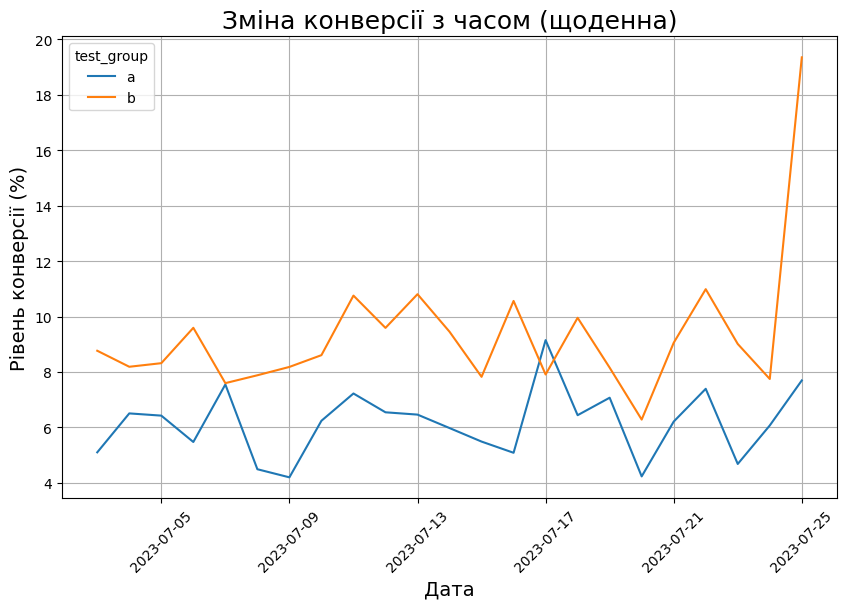

In [36]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=daily_data,
    x='date',
    y='conversion_rate',
        hue='test_group')

plt.title('Зміна конверсії з часом (щоденна)', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.xticks(fontsize=10, rotation=45)
plt.ylabel('Рівень конверсії (%)', fontsize=14)
plt.grid(True)
plt.show()